## Regression between the wind influence and AMV



I attach the wind influence on sea level for two new methods.
NearestPointAverage is the average of zonal winds at the 6 tide gauges.
PressureDifference is using the pressure in the southern box minus northern box of Dangendorf.
This way both methods have only one regressor for the wind. It makes them very simple and while it increases the deviance it reduces the standard error in the computation of the trend.


What you can do with these time series is the same as what you did in your thesis:
Fig. 13 a, b
Fig. 16 b, d
One difference is that instead of removing the linear trend from these time series you could remove the 3rd order trend. I use Polynomial from Numpy to do that (see the .html file of the notebook "Extend wind time series backward" section)
I find that this brings the pressure and wind results closer.


My suggestion for the maps of Fig 16 would be to use the SST product that is best correlated to the wind influence.
I hope we find more consistent results than Fig 16 d.
The doughnuts type of pattern you found in Fig 16 b, d for Dangendorf is interesting. Maybe you find something similar now as well.
If that is the case you could define a new "doughnut index" which is the average SST in that region. If that doughnut index average temperate lags behind the AMV temperature, which it probably does, then the problem of lag between AMV and wind influence on sea level is solved!

In [22]:
# import necessary packages

import xarray as xr
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tsa.tsatools

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Documents/Wind effect/Thesis-KNMI/AMV/code')

import regression as regr
import figures as fig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and process the wind data

In [23]:
wind_data = pd.read_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/WindInfluenceSeaLevelDutchCoast.csv', index_col = 'time')


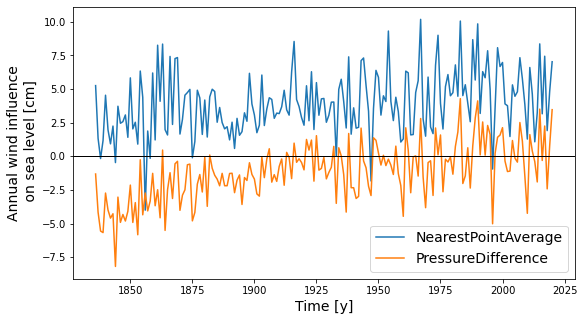

In [24]:
wind_data.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Annual wind influence\n on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.savefig(f'/Users/iriskeizer/Documents/Wind effect/Figures/AMV/timeseries_wind_raw', dpi = 500)

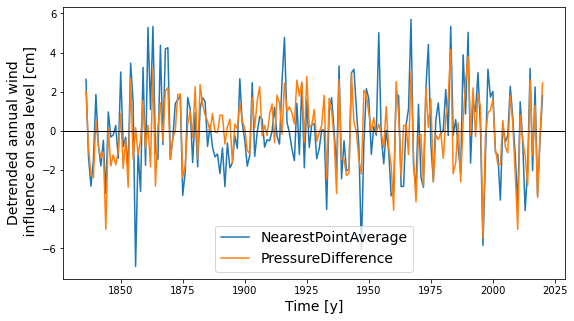

In [25]:
# Detrend the data using a first order polynomial
wind_data_dt = statsmodels.tsa.tsatools.detrend(wind_data, order=1, axis = 0)

wind_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended annual wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  

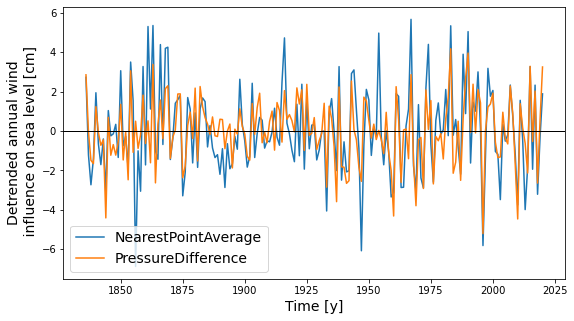

In [26]:
# Detrend the data using a second order polynomial
wind_data_dt = statsmodels.tsa.tsatools.detrend(wind_data, order=2, axis = 0)

wind_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended annual wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  

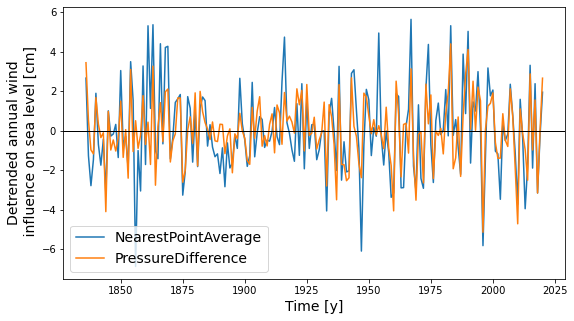

In [27]:
# Detrend the data using a third order polynomial
wind_data_dt = statsmodels.tsa.tsatools.detrend(wind_data, order=3, axis = 0)

wind_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended annual wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)
plt.savefig(f'/Users/iriskeizer/Documents/Wind effect/Figures/AMV/timeseries_wind_detrended', dpi = 500)

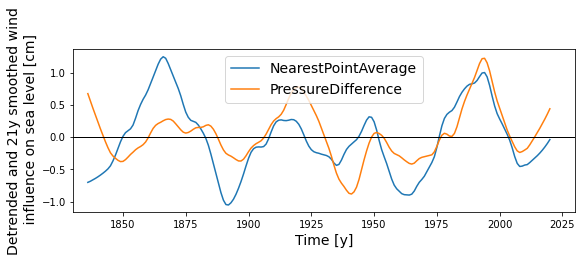

In [28]:
# Apply a LOWESS function with a 21-year smoothing window

def df_smooth(df, window):
    
    lowess = sm.nonparametric.lowess
    
    df_lo = df.copy()
    
    frac = window/(df.index.size)
    
    for column in df:
        df_lo[column] = lowess(df[column].values, df.index.values, frac, return_sorted=False)
        
        
    return df_lo


wind_data_dt_sm = df_smooth(wind_data_dt, 21)

wind_data_dt_sm.plot(figsize = (9,3))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 21y smoothed wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1) 
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/timeseries_wind_smoothed_detrended', bbox_inches='tight', dpi = 500)

In [29]:
wind_data_dt_sm.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_21')

#### Import and process the AMV data

The AMV data has been deseasonalized and detrended

In [30]:
path = '/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/'

# Deseasonalized and detrended
AMV_had = xr.open_dataset(path + 'AMO_ds_dt_raw_had.nc') 
AMV_ersst = xr.open_dataset(path + 'AMO_ds_dt_raw_ersst.nc') 
AMV_cobe = xr.open_dataset(path + 'AMO_ds_dt_raw_cobe.nc') 

# Change variable names
AMV_had = AMV_had.rename({'__xarray_dataarray_variable__': 'AMV'})
AMV_ersst = AMV_ersst.rename({'__xarray_dataarray_variable__': 'AMV'})
AMV_cobe = AMV_cobe.rename({'__xarray_dataarray_variable__': 'AMV'})

# Obtain annual averages 
AMV_had = AMV_had.groupby('time.year').mean('time')
AMV_ersst = AMV_ersst.groupby('time.year').mean('time')
AMV_cobe = AMV_cobe.groupby('time.year').mean('time')

# Create a dataframe 
AMV_data_dt = pd.DataFrame({'HadISSTv2': AMV_had.AMV, 'ERSSTv5':AMV_ersst.AMV, 'COBE-SST2': AMV_cobe.AMV}, index = AMV_cobe.year)
AMV_data_dt.index.name = 'time'

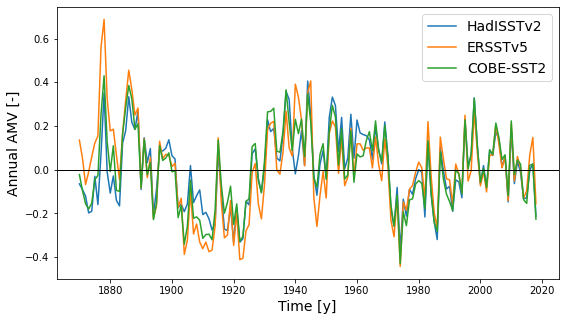

In [31]:
AMV_data_dt.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  

In [32]:
AMV_data_dt.columns

Index(['HadISSTv2', 'ERSSTv5', 'COBE-SST2'], dtype='object')

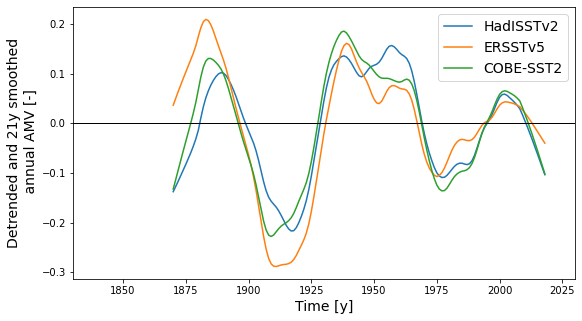

In [33]:
# Apply a LOWESS function with a 21-year smoothing window

AMV_data_dt_sm = df_smooth(AMV_data_dt, 21)

AMV_data_dt_sm.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 21y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_detrended_amv', bbox_inches='tight', dpi = 500)

### Perform regression

In [34]:
results, timeseries = regr.lagged_regression(AMV_data_dt_sm, wind_data_dt_sm)

In [35]:
results

HadISSTv2                                          \
         NearestPointAverage                                           
                         -30       -29       -28       -27       -26   
result                                                                 
rmse                0.529065  0.525059  0.520619  0.516513  0.513536   
r$^2$               0.053548  0.076626  0.101168  0.125387  0.147363   
constant           -0.045123 -0.035429 -0.025832 -0.016166 -0.006306   
coef                0.125844  0.151255  0.174664  0.195569  0.213493   

                                                            ...  \
                                                            ...   
               -25       -24       -23       -22       -21  ...   
result                                                      ...   
rmse      0.512135  0.512001  0.512371  0.512645  0.512884  ...   
r$^2$     0.165602  0.179715  0.190320  0.197934  0.202454  ...   
constant  0.003686  0.013406  0.022169  0.029440  0.034920  ...   
coef      0.228155  0.239652  0.248410  0.254666  0.258407  ...   

                  COBE-SST2                                                    \
         PressureDifference                                                     
                         21        22        23        24        25        26   
result                                                                          
rmse               0.469894  0.470562  0.468995  0.465402  0.460021  0.453243   
r$^2$              0.000451  0.002201  0.012812  0.031339  0.056347  0.085861   
constant           0.046256  0.049301  0.052761  0.056488  0.060450  0.064597   
coef              -0.009485  0.020947  0.050468  0.078787  0.105393  0.129724   

                                                  
                                                  
                27        28        29        30  
result                                            
rmse      0.445620  0.437851  0.430658  0.424626  
r$^2$     0.117551  0.149104  0.178499  0.204107  
constant  0.068815  0.072845  0.076352  0.079074  
coef      0.151282  0.169802  0.185254  0.197733  

[4 rows x 366 columns]

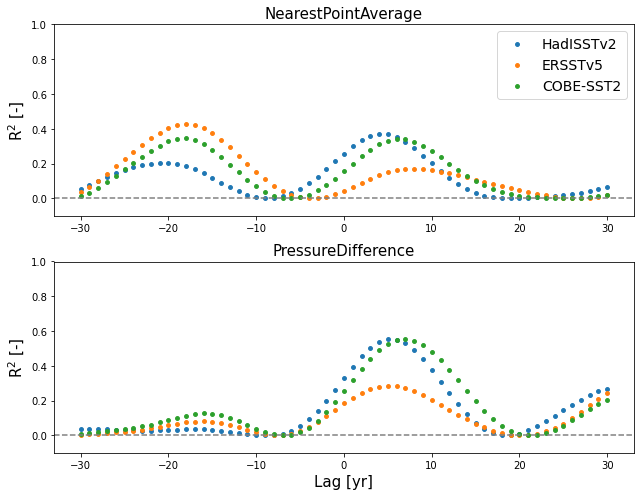

In [36]:
fig.plot_result_2(results, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0)

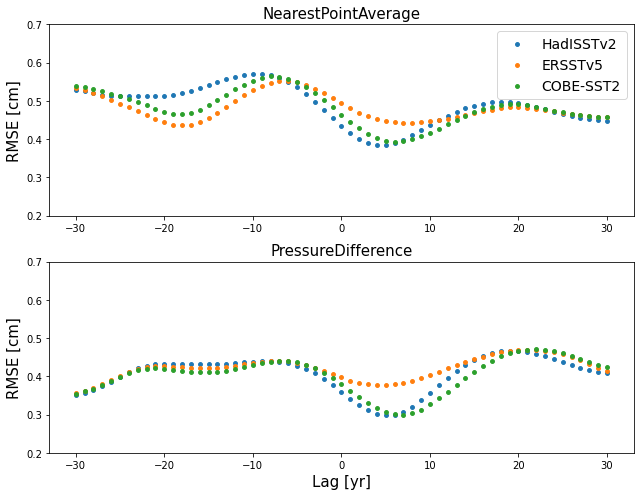

In [37]:
fig.plot_result_2(results, 'rmse', 'RMSE [cm]', ymin = 0.2, ymax = 0.7)

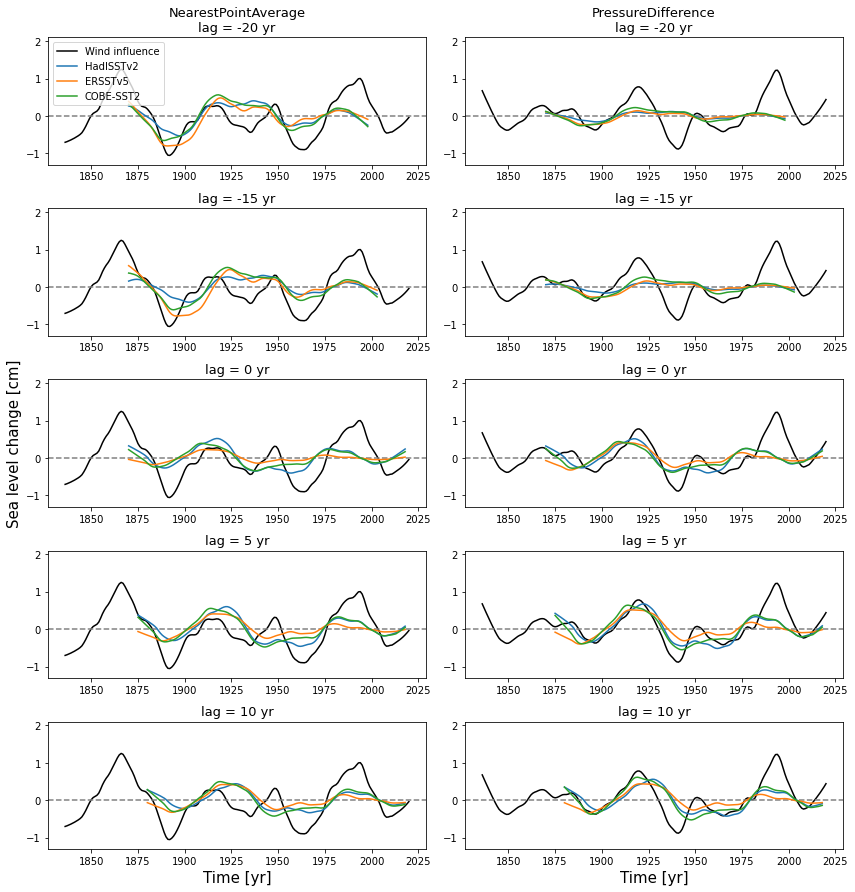

In [38]:
fig.plot_timeseries_2(timeseries, wind_data_dt_sm, [-20, -15, 0, 5, 10], ymin= -1.3, ymax = 2.1)

Also do the regression for other windows, for example 31, 41, 51y 

### Perform regression with 31y smoothing function

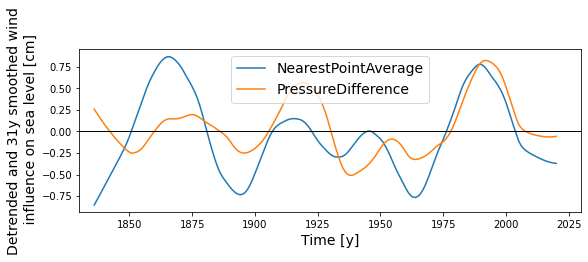

In [39]:
wind_data_dt_sm_31 = df_smooth(wind_data_dt, 31)

wind_data_dt_sm_31.plot(figsize = (9,3))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 31y smoothed wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1) 
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_31y_detrended_wind', bbox_inches='tight', dpi = 500)

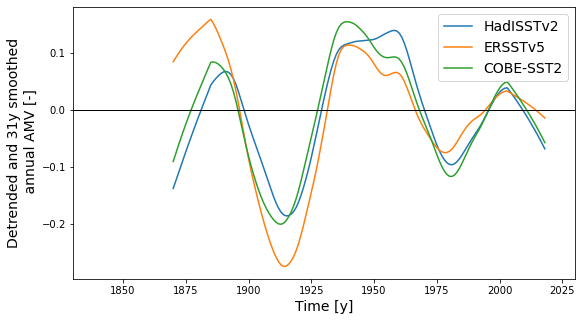

In [40]:
# Apply a LOWESS function with a 31-year smoothing window

AMV_data_dt_sm_31 = df_smooth(AMV_data_dt, 31)

AMV_data_dt_sm_31.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 31y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_31y_detrended_amv', bbox_inches='tight', dpi = 500)

In [41]:
AMV_data_dt_sm_31.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_31')

In [42]:
results_31, timeseries_31 = regr.lagged_regression(AMV_data_dt_sm_31, wind_data_dt_sm_31)

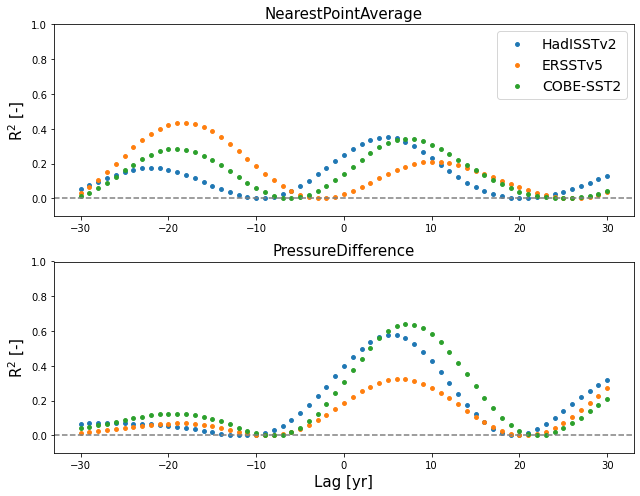

In [43]:
fig.plot_result_2(results_31, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 31)

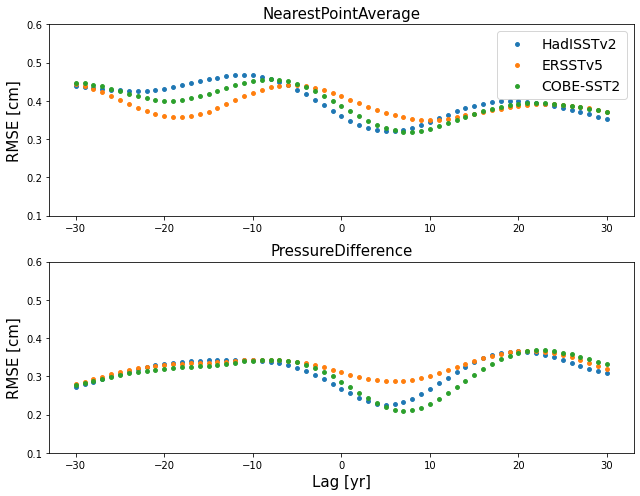

In [44]:
fig.plot_result_2(results_31, 'rmse', 'RMSE [cm]', ymin = 0.1, ymax = 0.6, window = 31)

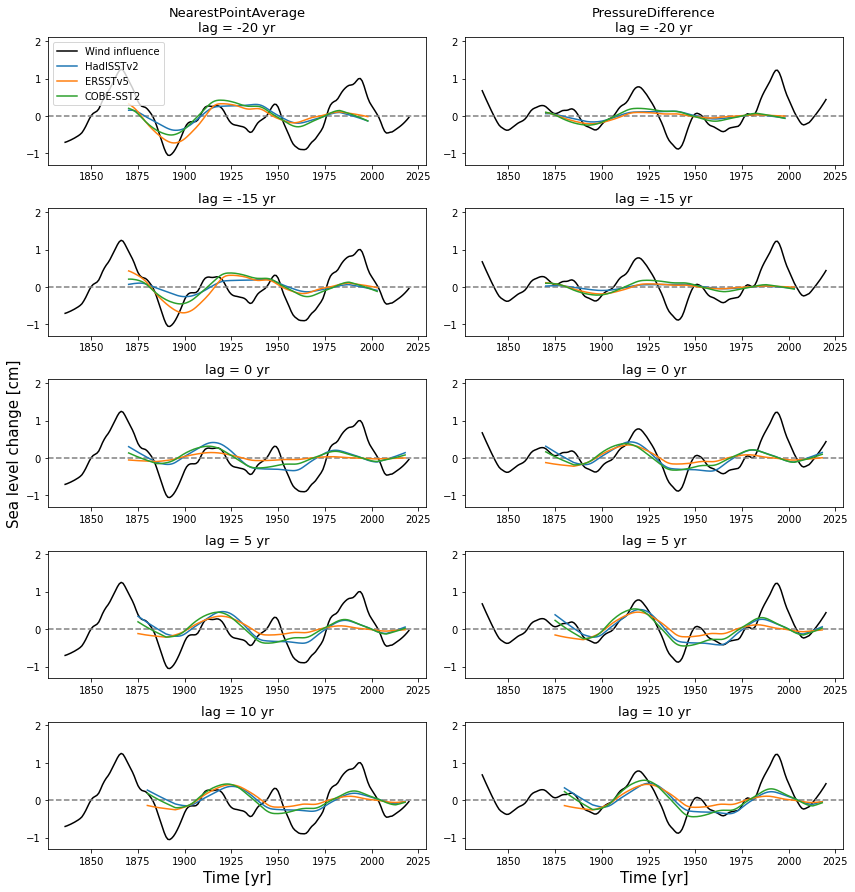

In [45]:
fig.plot_timeseries_2(timeseries_31, wind_data_dt_sm, [-20, -15, 0, 5, 10], ymin= -1.3, ymax = 2.1, window = 31)

### Perform regression with 41y smoothing function

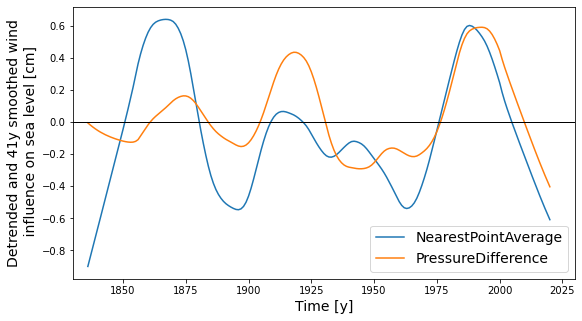

In [46]:
wind_data_dt_sm_41 = df_smooth(wind_data_dt, 41)

wind_data_dt_sm_41.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 41y smoothed wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1) 
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_41y_detrended_wind', bbox_inches='tight', dpi = 500)

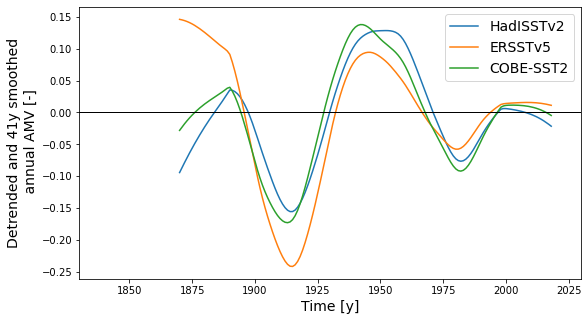

In [47]:
# Apply a LOWESS function with a 41-year smoothing window

AMV_data_dt_sm_41 = df_smooth(AMV_data_dt, 41)

AMV_data_dt_sm_41.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 41y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_41y_detrended_amv', bbox_inches='tight', dpi = 500)

In [48]:
wind_data_dt_sm_41.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_41')

In [49]:
results_41, timeseries_41 = regr.lagged_regression(AMV_data_dt_sm_41, wind_data_dt_sm_41)

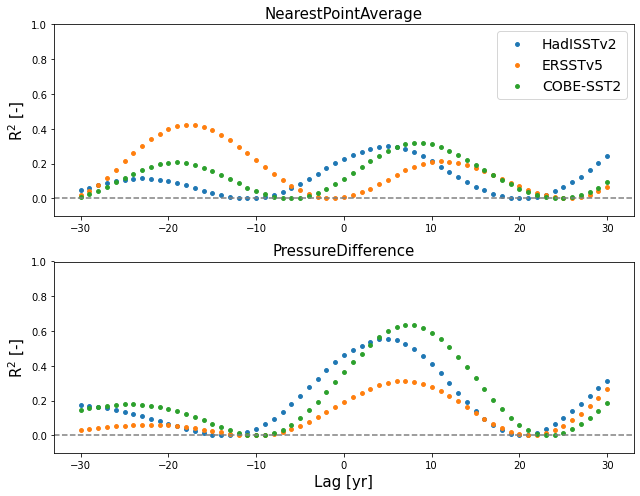

In [50]:
fig.plot_result_2(results_41, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 41)

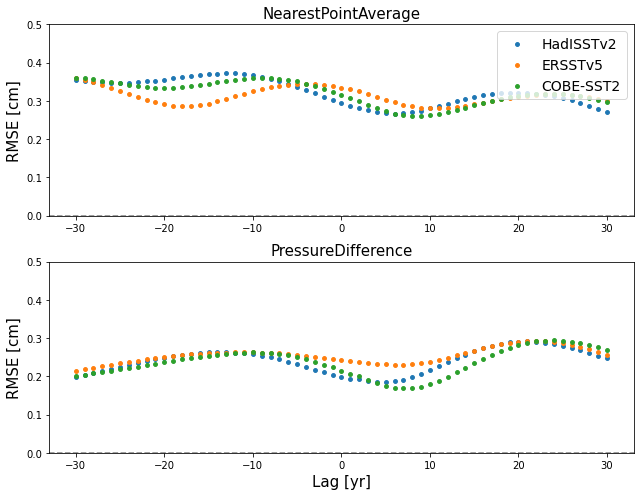

In [51]:
fig.plot_result_2(results_41, 'rmse', 'RMSE [cm]', ymin = 0.0, ymax = 0.5, window = 41)

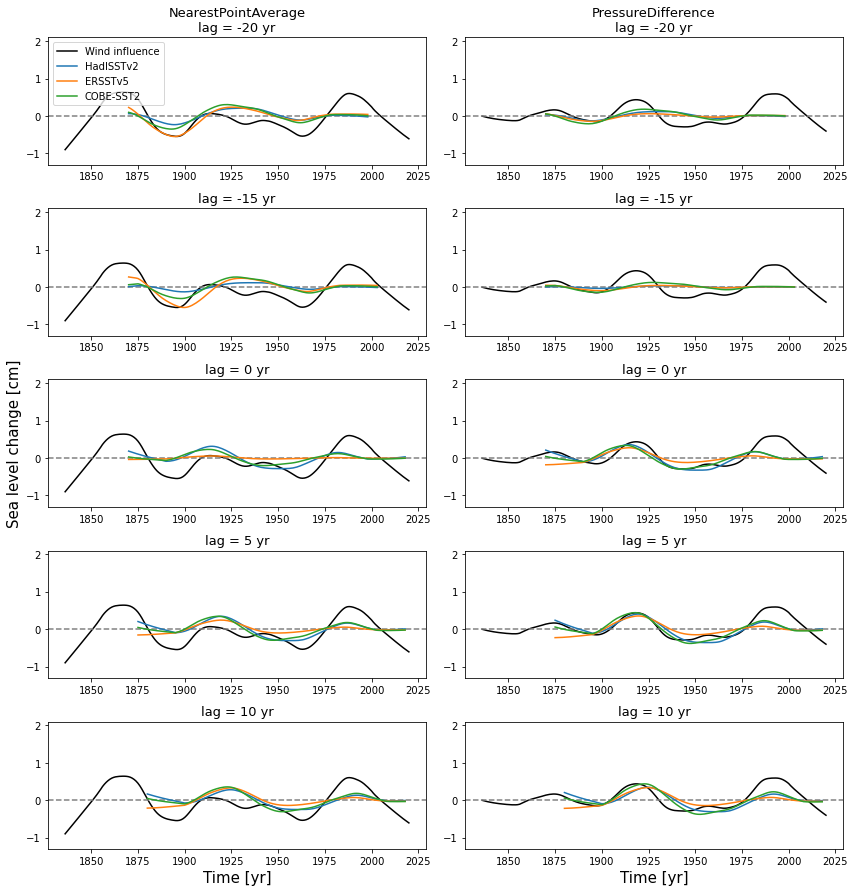

In [52]:
fig.plot_timeseries_2(timeseries_41, wind_data_dt_sm_41, [-20, -15, 0, 5, 10], ymin= -1.3, ymax = 2.1, window = 41)

### Perform regression with 51y smoothing function

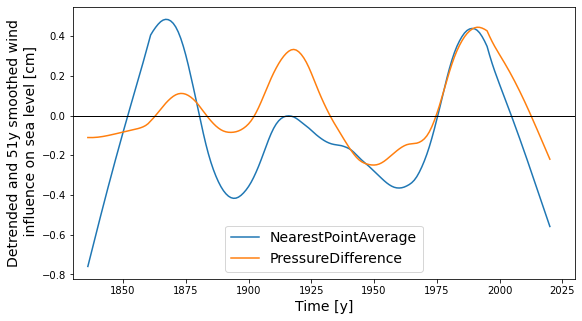

In [53]:
wind_data_dt_sm_51 = df_smooth(wind_data_dt, 51)

wind_data_dt_sm_51.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 51y smoothed wind\n influence on sea level [cm]', fontsize = 14)
plt.axhline(color='k', linewidth = 1) 
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_51y_detrended_wind', bbox_inches='tight', dpi = 500)

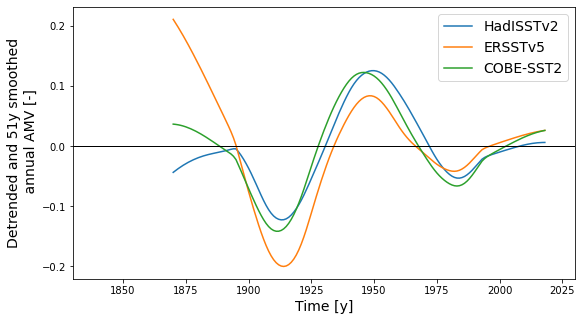

In [54]:
# Apply a LOWESS function with a 51-year smoothing window

AMV_data_dt_sm_51 = df_smooth(AMV_data_dt, 51)

AMV_data_dt_sm_51.plot(figsize = (9,5))
plt.legend(fontsize = 14)
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('Detrended and 51y smoothed\n annual AMV [-]', fontsize = 14)
plt.axhline(color='k', linewidth = 1)  
plt.xlim(1830,2030)
plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV/smoothed_51y_detrended_amv', bbox_inches='tight', dpi = 500)

In [55]:
AMV_data_dt_sm_51.to_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_51')

In [56]:
results_51, timeseries_51 = regr.lagged_regression(AMV_data_dt_sm_51, wind_data_dt_sm_51)

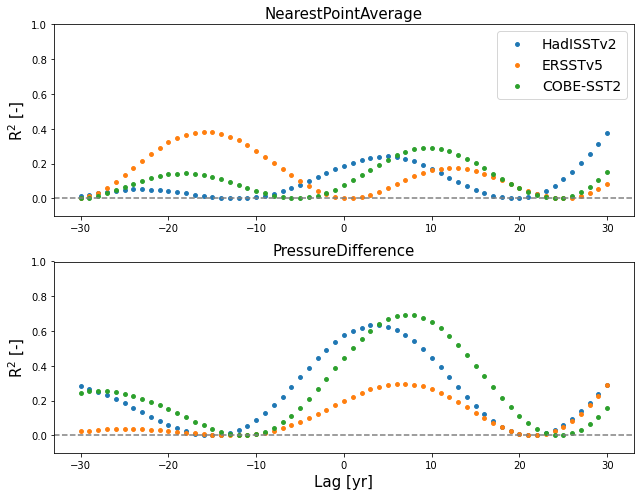

In [57]:
fig.plot_result_2(results_51, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 51)

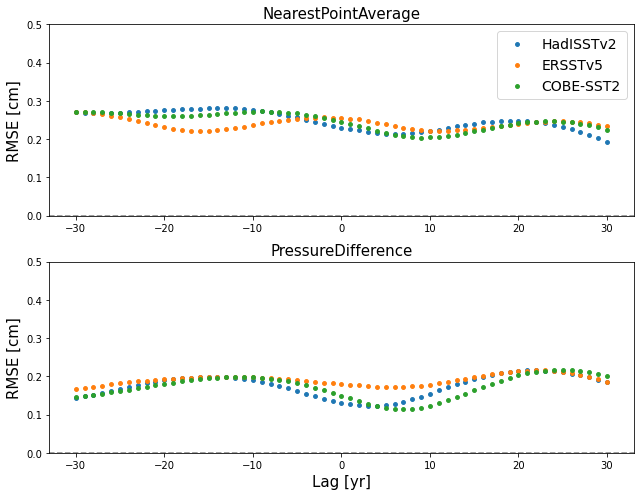

In [58]:
fig.plot_result_2(results_51, 'rmse', 'RMSE [cm]', ymin = 0.0, ymax = 0.5, window = 51)

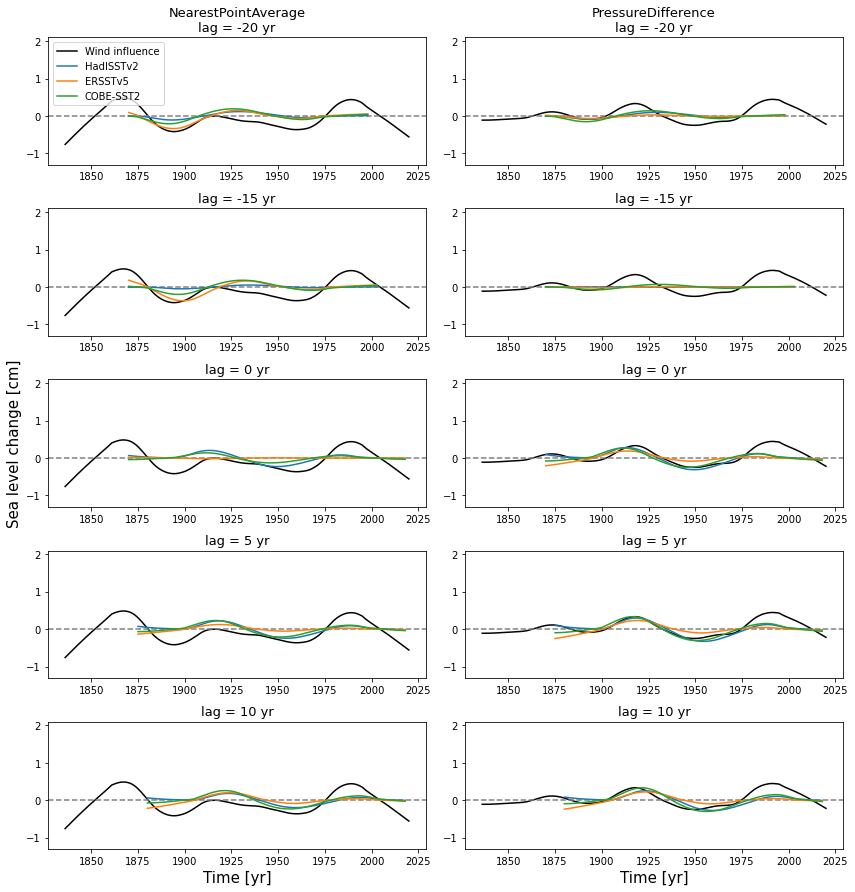

In [59]:
fig.plot_timeseries_2(timeseries_51, wind_data_dt_sm_51, [-20, -15, 0, 5, 10], ymin= -1.3, ymax = 2.1, window = 51)